<a href="https://colab.research.google.com/github/onehowon/Python/blob/main/%ED%99%95%ED%86%B5_%EC%8B%A4%EC%8A%B5_chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()


Saving ch4_scores400.csv to ch4_scores400.csv


In [ ]:
df = pd.read_csv('ch4_scores400.csv')
df

,score
0,76
1,55
2,80
3,80
4,74
...,...
395,77
396,60
397,83
398,80


In [ ]:
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [ ]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.400

In [ ]:
for i in range(5):
  sample = np.random.choice(scores,20)
  print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 70.7
2번째 무작위추출로 얻은 표본평균 71.9
3번째 무작위추출로 얻은 표본평균 71.25
4번째 무작위추출로 얻은 표본평균 67.4
5번째 무작위추출로 얻은 표본평균 67.7


In [ ]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [ ]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5, 2, 6, 5, 6, 3, 6, 3, 5, 2, 6, 6,
       5, 4, 2, 5, 4, 6, 6, 6, 6, 1, 4, 6, 3, 5, 2, 3, 1, 6, 3, 4, 6, 5,
       1, 3, 5, 5, 3, 6, 5, 5, 5, 6, 4, 4, 3, 3, 6, 6, 5, 3, 3, 2, 4, 4,
       5, 4, 3, 1, 2, 5, 4, 5, 6, 6, 3, 5, 3, 1, 6, 4, 4, 5, 6, 5, 6, 3,
       6, 3, 6, 5, 3, 6, 6, 3, 3, 5, 1, 3])

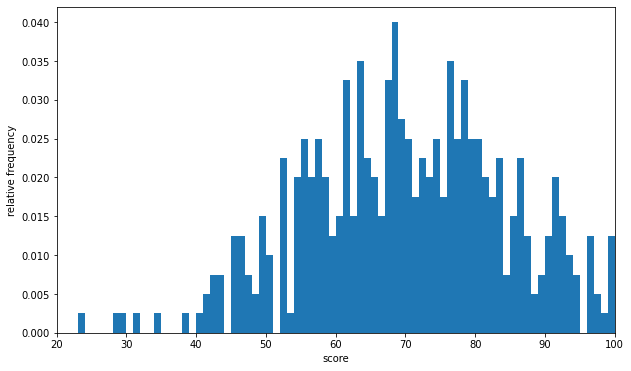

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density = True)
ax.set_xlim(20,100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

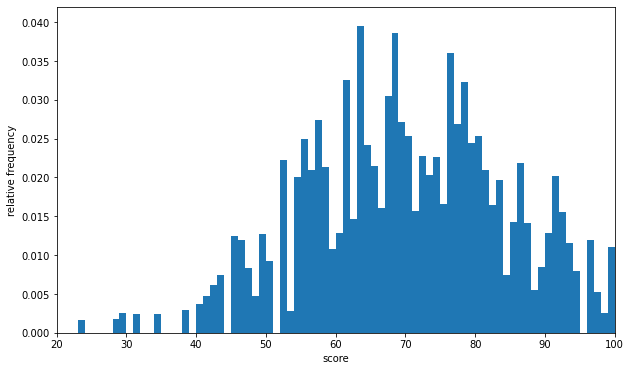

In [ ]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize =(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()


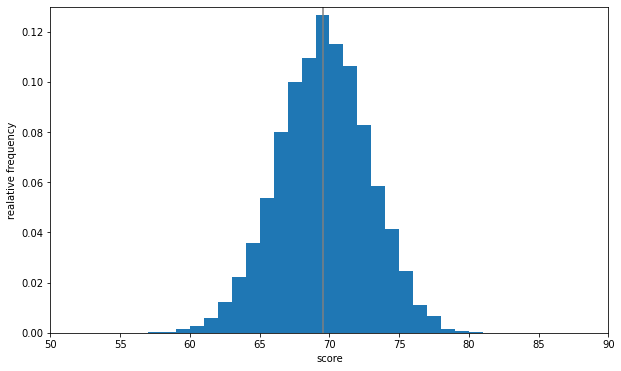

In [ ]:
sample_means = [np.random.choice(scores, 20).mean() 
for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('realative frequency')
plt.show()

In [ ]:
x_set = np.array([1,2,3,4,5,6])

In [ ]:
def f(x):
  if x in x_set:
    return x/21
  else:
    return 0


In [ ]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

In [ ]:
def F(x):
  return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [ ]:
F(3)

0.286

In [ ]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [ ]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.335

In [ ]:
X = [x_set, f]

def E(X, g=lambda x: x):
  x_set, f = X
  return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X, g=lambda x: 2*x + 3)

11.667

In [ ]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [ ]:
def V(X, g=lambda x:x):
  x_set, f = X
  mean = E(X,g)
  return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X,lambda x: 2*x + 3)

8.889

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [ ]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
  x_set, f = X
  return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
  x_set, f = X
  mean = E(X,g)
  return np.sum([(g(x_k)-mean) **2 *f(x_k) for x_k in x_set])

def check_prob(X):
  x_set, f = X
  prob = np.array([f(x_k) for x_k in x_set])
  assert np.all(prob >= 0), 'minus probability'
  prob_sum = np.round(np.sum(prob), 6)
  assert prob_sum == 1, f'sum of probability{prob_sum}'
  print(f'expected value {E(X):.4}')
  print(f'variance{(V(X)):.4}')

def plot_prob(X):
  x_set, f = X
  prob = np.array([f(x_k) for x_k in x_set])

  fig = plt.figure(figsize = (10,6))
  ax = fig.add_subplot(111)
  ax.bar(x_set, prob, label = 'prob')
  ax.vlines(E(X), 0, 1, label = 'mean')
  ax.set_xticks(np.append(x_set, E(X)))
  ax.set_ylim(0, prob.max()*1.2)
  ax.legend()

  plt.show()

In [ ]:
def Bern(p):
  x_set = np.array([0,1])
  def f(x):
    if x in x_set:
      return p ** x * (1-p) ** (1-x)
    else:
      return 0
  return x_set, f

In [ ]:
p = 0.3
X = Bern(p)

In [ ]:
check_prob(X)

expected value 0.3
variance0.21


In [ ]:
rv = stats.bernoulli(p)

In [ ]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [ ]:
rv.pmf([0,1])

array([0.7, 0.3])

In [ ]:
rv.cdf([0,1])

array([0.7, 1. ])

In [ ]:
rv.mean(), rv.var()

(0.300, 0.210)